In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 44.6 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="4ZFQZvLV2ROed0LwhPFA")
project = rf.workspace("valorantabilitiesnew").project("valorantagentdetection")
version = project.version(25)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ValorantAgentDetection-25 in yolov8:: 100%|██████████| 4502/4502 [00:01<00:00, 4464.55it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import torch
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8s.pt")
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

100%|██████████| 21.5M/21.5M [00:00<00:00, 22.8MB/s]


In [ ]:
print(torch.cuda.is_available())  # Should return True if a GPU is available
print(torch.cuda.current_device())  # Check which device is being used
print(torch.cuda.memory_allocated())  # Check the GPU memory being used

True
0
44899328


In [ ]:
print(dataset.location)
import torch
torch.cuda.empty_cache()
%env PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

/content/ValorantAgentDetection-25
env: PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True


# Model Training

In [ ]:
model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=720,
            batch=4,
            lr0=0.001,
            optimizer='AdamW')

engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/ValorantAgentDetection-25/data.yaml, epochs=100, time=None, patience=100, batch=4, imgsz=720, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, opti

100%|██████████| 755k/755k [00:00<00:00, 8.33MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 333MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[720] must be multiple of max stride 32, updating to [736]


train: Scanning /content/ValorantAgentDetection-25/train/labels... 2007 images, 9 backgrounds, 0 corrupt: 100%|██████████| 2007/2007 [00:01<00:00, 1611.41it/s]


train: New cache created: /content/ValorantAgentDetection-25/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1214, len(boxes) = 2130. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/ValorantAgentDetection-25/valid/labels... 148 images, 2 backgrounds, 0 corrupt: 100%|██████████| 148/148 [00:00<00:00, 1335.25it/s]

val: New cache created: /content/ValorantAgentDetection-25/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 114, len(boxes) = 150. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 736 train, 736 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.57G      1.644        1.7      1.428          4        736: 100%|██████████| 502/502 [01:23<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.60it/s]

                   all        148        150       0.77      0.772      0.738      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.55G      1.625      1.329      1.443          4        736: 100%|██████████| 502/502 [01:20<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 11.93it/s]

                   all        148        150      0.658      0.658      0.682        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.49G      1.571      1.209      1.393          2        736: 100%|██████████| 502/502 [01:18<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.64it/s]

                   all        148        150      0.771      0.692      0.758      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.49G      1.596      1.203      1.407          5        736: 100%|██████████| 502/502 [01:18<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.82it/s]

                   all        148        150      0.771      0.748       0.79       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       1.5G      1.537      1.136      1.384          7        736: 100%|██████████| 502/502 [01:19<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.30it/s]

                   all        148        150      0.853      0.822      0.851       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       1.5G      1.515      1.073      1.385          8        736: 100%|██████████| 502/502 [01:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.22it/s]

                   all        148        150       0.86      0.835      0.864      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       1.5G      1.498      1.069      1.357          7        736: 100%|██████████| 502/502 [01:20<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.86it/s]

                   all        148        150      0.839      0.856      0.888      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.48G      1.456      1.009      1.329          9        736: 100%|██████████| 502/502 [01:17<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.05it/s]

                   all        148        150      0.805      0.841      0.842      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.53G       1.42      0.939      1.295          6        736: 100%|██████████| 502/502 [01:18<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.55it/s]

                   all        148        150      0.763      0.824      0.815      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       1.5G      1.409     0.9302      1.295          7        736: 100%|██████████| 502/502 [01:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.13it/s]

                   all        148        150      0.692      0.837      0.723       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       1.5G      1.412     0.8878      1.297          8        736: 100%|██████████| 502/502 [01:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 11.53it/s]

                   all        148        150      0.884      0.838      0.886      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.52G      1.363     0.8784      1.275          6        736: 100%|██████████| 502/502 [01:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.54it/s]

                   all        148        150      0.886      0.803       0.88      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.53G      1.358     0.8681      1.267          4        736: 100%|██████████| 502/502 [01:18<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.99it/s]

                   all        148        150      0.956      0.879      0.927      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       1.5G       1.33     0.8413      1.241          5        736: 100%|██████████| 502/502 [01:16<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.85it/s]


                   all        148        150      0.796      0.908      0.925      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.55G      1.325     0.8254      1.246          7        736: 100%|██████████| 502/502 [01:18<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.43it/s]

                   all        148        150       0.86      0.858      0.852      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.55G      1.299     0.8059       1.24          9        736: 100%|██████████| 502/502 [01:19<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.08it/s]

                   all        148        150      0.932      0.884      0.909      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.51G      1.324     0.7815      1.235          5        736: 100%|██████████| 502/502 [01:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.05it/s]

                   all        148        150      0.919      0.895      0.922      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       1.5G       1.35     0.8111      1.254          4        736: 100%|██████████| 502/502 [01:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.13it/s]

                   all        148        150      0.928       0.89      0.931      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.53G      1.257     0.7639      1.209          8        736: 100%|██████████| 502/502 [01:18<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.91it/s]

                   all        148        150      0.864      0.905        0.9      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.49G       1.27     0.7552      1.205          4        736: 100%|██████████| 502/502 [01:17<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.65it/s]

                   all        148        150      0.926      0.887      0.935      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       1.5G      1.265     0.7413      1.204          3        736: 100%|██████████| 502/502 [01:19<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.49it/s]

                   all        148        150      0.936      0.879      0.926      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.54G      1.244     0.7165       1.19          2        736: 100%|██████████| 502/502 [01:18<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.18it/s]

                   all        148        150      0.922      0.882      0.917      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       1.5G      1.235      0.699      1.184          9        736: 100%|██████████| 502/502 [01:21<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.15it/s]

                   all        148        150      0.857      0.919      0.915      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.51G      1.209     0.6979      1.165         10        736: 100%|██████████| 502/502 [01:19<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.20it/s]

                   all        148        150      0.927      0.924      0.948      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       1.5G      1.209     0.7028       1.16          6        736: 100%|██████████| 502/502 [01:18<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.89it/s]

                   all        148        150      0.911      0.878      0.914      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.56G       1.21     0.7059      1.172          9        736: 100%|██████████| 502/502 [01:17<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.15it/s]

                   all        148        150      0.905      0.884      0.914      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.56G      1.171     0.6823      1.141          7        736: 100%|██████████| 502/502 [01:18<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.99it/s]

                   all        148        150      0.917      0.919      0.947      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       1.5G      1.153     0.6752       1.15          6        736: 100%|██████████| 502/502 [01:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.34it/s]

                   all        148        150      0.951      0.928      0.941       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.56G      1.137     0.6595      1.128          8        736: 100%|██████████| 502/502 [01:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.03it/s]

                   all        148        150      0.958      0.903      0.929      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       1.5G      1.128     0.6522      1.125          5        736: 100%|██████████| 502/502 [01:18<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.58it/s]

                   all        148        150      0.932      0.929      0.955      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.52G      1.102     0.6198      1.121          6        736: 100%|██████████| 502/502 [01:18<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.49it/s]

                   all        148        150      0.922      0.919      0.946      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.49G      1.122     0.6215      1.106          6        736: 100%|██████████| 502/502 [01:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.00it/s]

                   all        148        150      0.923      0.892      0.933      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       1.5G      1.121     0.6309       1.12          6        736: 100%|██████████| 502/502 [01:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.33it/s]

                   all        148        150      0.933      0.914      0.942      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.51G      1.064     0.6207      1.091          9        736: 100%|██████████| 502/502 [01:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 11.83it/s]

                   all        148        150      0.932      0.928      0.943      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       1.5G      1.074     0.6103      1.081          3        736: 100%|██████████| 502/502 [01:18<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.22it/s]

                   all        148        150      0.914      0.887      0.931      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.51G      1.072     0.5972      1.083          7        736: 100%|██████████| 502/502 [01:18<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.31it/s]

                   all        148        150      0.954       0.95      0.971      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.51G      1.016     0.5862      1.057          8        736: 100%|██████████| 502/502 [01:17<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  9.48it/s]

                   all        148        150      0.936      0.909      0.941      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.51G      1.044     0.6001      1.071          6        736: 100%|██████████| 502/502 [01:19<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.08it/s]

                   all        148        150      0.878      0.873      0.876        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.56G      1.019     0.5919      1.071          7        736: 100%|██████████| 502/502 [01:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.39it/s]

                   all        148        150      0.924      0.905      0.935      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.49G      1.022     0.5685      1.065          3        736: 100%|██████████| 502/502 [01:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.12it/s]

                   all        148        150      0.856      0.914       0.93      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.49G      1.014     0.5661      1.054          6        736: 100%|██████████| 502/502 [01:19<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.24it/s]

                   all        148        150       0.93      0.895      0.933      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.49G     0.9958     0.5684      1.046          7        736: 100%|██████████| 502/502 [01:19<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.45it/s]

                   all        148        150      0.953      0.921      0.942      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.53G     0.9645     0.5401      1.035          8        736: 100%|██████████| 502/502 [01:17<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.81it/s]

                   all        148        150      0.964      0.914      0.943      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.53G     0.9911     0.5603      1.043          8        736: 100%|██████████| 502/502 [01:18<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.95it/s]

                   all        148        150      0.907      0.899      0.922      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.53G     0.9448     0.5297      1.032          6        736: 100%|██████████| 502/502 [01:19<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.41it/s]

                   all        148        150      0.972      0.897      0.946       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.53G     0.9549     0.5382      1.038          8        736: 100%|██████████| 502/502 [01:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.18it/s]

                   all        148        150       0.93      0.905      0.945       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.54G      0.944     0.5299      1.031          6        736: 100%|██████████| 502/502 [01:19<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.14it/s]

                   all        148        150      0.918      0.932      0.939      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.47G     0.9513     0.5359      1.034         10        736: 100%|██████████| 502/502 [01:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.37it/s]

                   all        148        150      0.942      0.941      0.958      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.49G     0.9084      0.533      1.013          8        736: 100%|██████████| 502/502 [01:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.48it/s]

                   all        148        150      0.929      0.951      0.959      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.56G     0.9106     0.5195      1.003          7        736: 100%|██████████| 502/502 [01:17<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.41it/s]

                   all        148        150      0.962      0.915      0.956      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.49G       0.91     0.5125      1.003          6        736: 100%|██████████| 502/502 [01:18<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 11.52it/s]

                   all        148        150      0.957      0.902       0.95      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       1.5G      0.896     0.5009      1.004          8        736: 100%|██████████| 502/502 [01:19<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.35it/s]

                   all        148        150      0.944      0.915      0.959      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.56G     0.8921     0.4978      1.003          8        736: 100%|██████████| 502/502 [01:21<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.09it/s]

                   all        148        150      0.952        0.9      0.952      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       1.5G     0.8672     0.4822     0.9914          9        736: 100%|██████████| 502/502 [01:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.41it/s]

                   all        148        150      0.935      0.946      0.964       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.53G     0.8667     0.4846      1.004          7        736: 100%|██████████| 502/502 [01:19<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.49it/s]

                   all        148        150      0.958      0.922      0.963      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.54G      0.857     0.4848     0.9884          6        736: 100%|██████████| 502/502 [01:19<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.45it/s]

                   all        148        150      0.935      0.933      0.947      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.57G     0.8529     0.4801     0.9865          8        736: 100%|██████████| 502/502 [01:18<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 11.72it/s]

                   all        148        150      0.973      0.914      0.956      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.56G     0.8525     0.4888     0.9879          6        736: 100%|██████████| 502/502 [01:19<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.20it/s]

                   all        148        150      0.947      0.936      0.961      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.56G     0.8372     0.4736     0.9822          6        736: 100%|██████████| 502/502 [01:21<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.34it/s]

                   all        148        150      0.981      0.952      0.968      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.56G     0.8377     0.4653     0.9693          3        736: 100%|██████████| 502/502 [01:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.33it/s]

                   all        148        150       0.96      0.946      0.964      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.51G     0.8429     0.4705     0.9754          4        736: 100%|██████████| 502/502 [01:19<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  9.06it/s]

                   all        148        150      0.942      0.947      0.955      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.51G     0.8145     0.4612     0.9699          5        736: 100%|██████████| 502/502 [01:18<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.59it/s]

                   all        148        150      0.956      0.945       0.96      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.49G     0.8309     0.4707     0.9647          5        736: 100%|██████████| 502/502 [01:18<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.18it/s]

                   all        148        150      0.982      0.897       0.96       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.47G     0.8151     0.4538     0.9666          7        736: 100%|██████████| 502/502 [01:19<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.55it/s]

                   all        148        150      0.962       0.96      0.966      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.53G     0.8061     0.4649     0.9669          3        736: 100%|██████████| 502/502 [01:20<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.15it/s]

                   all        148        150      0.968      0.918      0.954      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.49G     0.7902      0.442     0.9591          4        736: 100%|██████████| 502/502 [01:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.21it/s]

                   all        148        150       0.97      0.942      0.964      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.49G       0.79     0.4443       0.96          6        736: 100%|██████████| 502/502 [01:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  9.21it/s]

                   all        148        150      0.963      0.945      0.967      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       1.5G     0.7981     0.4451     0.9581          5        736: 100%|██████████| 502/502 [01:19<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.83it/s]

                   all        148        150      0.944      0.935      0.968      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.54G     0.7756     0.4385     0.9566          3        736: 100%|██████████| 502/502 [01:17<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.44it/s]

                   all        148        150      0.957      0.964      0.968      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.49G     0.7777     0.4402      0.957          8        736: 100%|██████████| 502/502 [01:17<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.56it/s]

                   all        148        150      0.963      0.948       0.96      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       1.5G     0.7526     0.4229     0.9522          9        736: 100%|██████████| 502/502 [01:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.09it/s]

                   all        148        150       0.93      0.946      0.965      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.48G     0.7614     0.4268     0.9486          2        736: 100%|██████████| 502/502 [01:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.25it/s]

                   all        148        150      0.949      0.924      0.964      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       1.5G     0.7722     0.4341     0.9493          6        736: 100%|██████████| 502/502 [01:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.18it/s]

                   all        148        150      0.942       0.91       0.96      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       1.5G     0.7419     0.4176     0.9383          8        736: 100%|██████████| 502/502 [01:19<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 11.91it/s]

                   all        148        150      0.967       0.91      0.967      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.54G     0.7373     0.4138     0.9441          5        736: 100%|██████████| 502/502 [01:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.24it/s]

                   all        148        150      0.972      0.964      0.972      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.54G     0.7417     0.4185     0.9414          4        736: 100%|██████████| 502/502 [01:19<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.44it/s]

                   all        148        150      0.978      0.928      0.966      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       1.5G     0.7266      0.408     0.9384          9        736: 100%|██████████| 502/502 [01:19<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.99it/s]

                   all        148        150      0.966      0.939      0.969       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       1.5G      0.716     0.4059     0.9279          5        736: 100%|██████████| 502/502 [01:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.62it/s]

                   all        148        150       0.96      0.945      0.968      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       1.5G     0.7204     0.4115     0.9307          9        736: 100%|██████████| 502/502 [01:21<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.31it/s]

                   all        148        150      0.967      0.938      0.965      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.51G     0.7063     0.3929     0.9244          4        736: 100%|██████████| 502/502 [01:21<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.26it/s]

                   all        148        150      0.965      0.934      0.969      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.51G      0.702     0.3953     0.9286          6        736: 100%|██████████| 502/502 [01:20<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.30it/s]

                   all        148        150      0.943       0.94      0.964      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.56G     0.7041     0.3914     0.9219          6        736: 100%|██████████| 502/502 [01:21<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.11it/s]

                   all        148        150      0.967      0.936      0.964      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       1.5G     0.6934     0.3863     0.9275          7        736: 100%|██████████| 502/502 [01:22<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.33it/s]

                   all        148        150      0.974      0.938      0.962      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.54G     0.6816     0.3812     0.9193          6        736: 100%|██████████| 502/502 [01:21<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.28it/s]

                   all        148        150      0.957       0.94      0.964      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       1.5G      0.682     0.3853     0.9195          5        736: 100%|██████████| 502/502 [01:21<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.10it/s]

                   all        148        150      0.927      0.961      0.967      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       1.5G     0.6782     0.3827     0.9164          4        736: 100%|██████████| 502/502 [01:21<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.05it/s]

                   all        148        150      0.948       0.95      0.962      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.56G     0.6776      0.388     0.9196          9        736: 100%|██████████| 502/502 [01:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.33it/s]

                   all        148        150      0.973      0.938      0.975      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.54G     0.6853     0.3891     0.9235          3        736: 100%|██████████| 502/502 [01:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 11.06it/s]

                   all        148        150      0.968      0.955      0.969      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       1.5G     0.6579      0.375     0.9104          9        736: 100%|██████████| 502/502 [01:21<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.36it/s]

                   all        148        150      0.955      0.955      0.969      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       1.5G     0.6459     0.3651     0.9046          6        736: 100%|██████████| 502/502 [01:21<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.70it/s]

                   all        148        150      0.966      0.942      0.969      0.696


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       1.5G     0.5986     0.3216     0.8651          3        736: 100%|██████████| 502/502 [01:19<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.45it/s]

                   all        148        150      0.958      0.936      0.968      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.56G      0.569     0.3089     0.8471          3        736: 100%|██████████| 502/502 [01:18<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 11.84it/s]

                   all        148        150      0.953      0.935      0.962      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       1.5G     0.5666     0.3105     0.8481          2        736: 100%|██████████| 502/502 [01:19<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.10it/s]

                   all        148        150      0.942       0.96      0.971      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       1.5G     0.5569     0.3042      0.845          4        736: 100%|██████████| 502/502 [01:20<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 11.63it/s]

                   all        148        150      0.969      0.942       0.97      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.49G     0.5447     0.2992      0.846          3        736: 100%|██████████| 502/502 [01:19<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.20it/s]

                   all        148        150      0.943      0.919      0.956      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.48G     0.5401     0.2958     0.8377          3        736: 100%|██████████| 502/502 [01:19<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.74it/s]

                   all        148        150      0.965      0.939       0.97      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.56G     0.5406     0.2975     0.8423          3        736: 100%|██████████| 502/502 [01:19<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.34it/s]

                   all        148        150      0.945      0.925      0.961      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.51G      0.534     0.2936     0.8386          3        736: 100%|██████████| 502/502 [01:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.13it/s]

                   all        148        150      0.937      0.932      0.959      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.56G     0.5232     0.2902     0.8366          3        736: 100%|██████████| 502/502 [01:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 12.17it/s]

                   all        148        150      0.942      0.942      0.963      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.54G     0.5183     0.2865     0.8324          5        736: 100%|██████████| 502/502 [01:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.54it/s]

                   all        148        150      0.944      0.958      0.971       0.71



100 epochs completed in 2.297 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  9.16it/s]


                   all        148        150      0.942      0.942      0.963      0.714
             Brimstone         35         36      0.918      0.936      0.969      0.654
                Cypher        111        114      0.965      0.947      0.957      0.774
Speed: 0.3ms preprocess, 5.0ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f348be17df0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model = YOLO("runs/detect/train/weights/best.pt")

In [ ]:
results = model.val(data=f"{dataset.location}/data.yaml", split='test')
map_50 = results.box.map50
print(f"Model Accuracy (mAP@50): {map_50:.3f}")

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/ValorantAgentDetection-25/test/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 1105.44it/s]

val: New cache created: /content/ValorantAgentDetection-25/test/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 57, len(boxes) = 94. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.11s/it]


                   all         90         94      0.903      0.863      0.886      0.637
             Brimstone         34         37      0.828      0.779      0.787      0.481
                Cypher         56         57      0.978      0.947      0.985      0.793
Speed: 1.2ms preprocess, 17.8ms inference, 0.0ms loss, 9.4ms postprocess per image
Results saved to runs/detect/val
Model Accuracy (mAP@50): 0.886


In [ ]:
torch.save(model.state_dict(), 'valomodelv2.pt')

In [ ]:
test_images_path = f"{dataset.location}/test/images"
predictions = model.predict(source=test_images_path, save=True, save_txt=False)


image 1/90 /content/ValorantAgentDetection-25/test/images/Valorant-Screenshot-2024-11-10-21-05-01-69_png.rf.df9ba4175dd1f805d9171e74c39cf847.jpg: 480x736 1 Brimstone, 114.1ms
image 2/90 /content/ValorantAgentDetection-25/test/images/Valorant-Screenshot-2024-11-10-21-05-21-28_png.rf.db354bbee2770e38e2cbe506b00f185a.jpg: 480x736 1 Brimstone, 15.1ms
image 3/90 /content/ValorantAgentDetection-25/test/images/Valorant-Screenshot-2024-11-10-21-06-21-11_png.rf.67d76dae0caf8be48ac7330da5cbfc68.jpg: 480x736 1 Brimstone, 15.2ms
image 4/90 /content/ValorantAgentDetection-25/test/images/Valorant-Screenshot-2024-11-10-21-06-29-75_png.rf.483335b5f0b70f69770597033566bfc1.jpg: 480x736 1 Brimstone, 15.0ms
image 5/90 /content/ValorantAgentDetection-25/test/images/Valorant-Screenshot-2024-11-10-21-08-29-56_png.rf.074c43a2d5a4ef0ad89cc7a76503eb93.jpg: 480x736 1 Brimstone, 15.1ms
image 6/90 /content/ValorantAgentDetection-25/test/images/Valorant-Screenshot-2024-11-10-21-10-40-94_png.rf.737282318b3fc54a253b

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

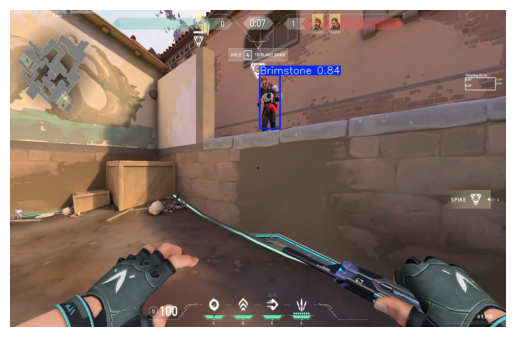

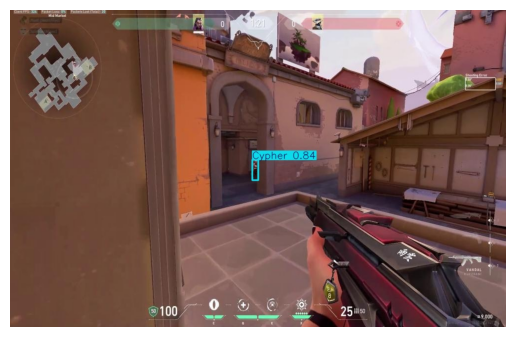

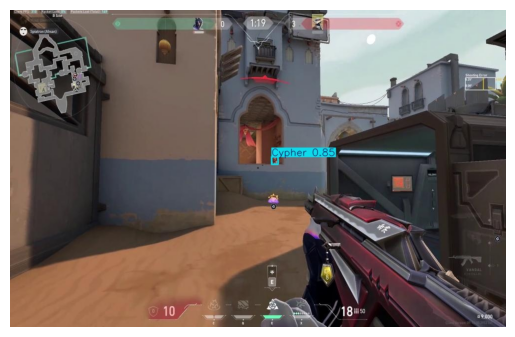

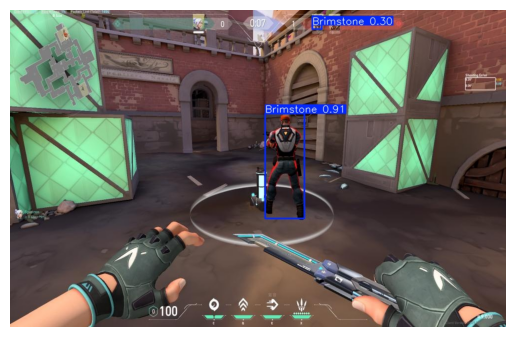

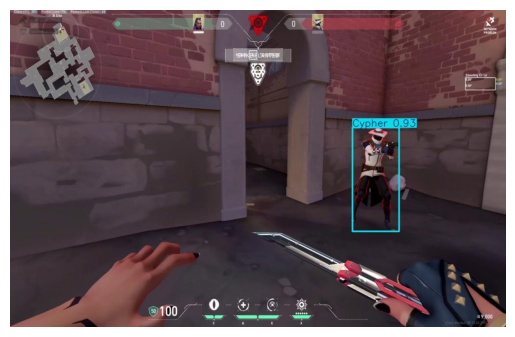

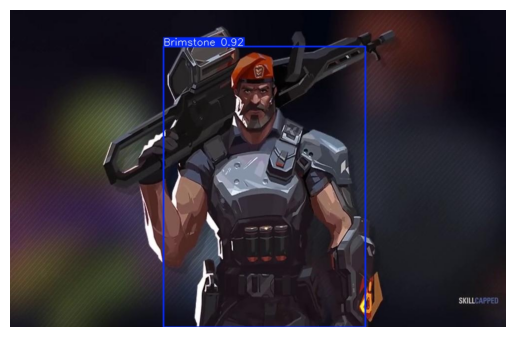

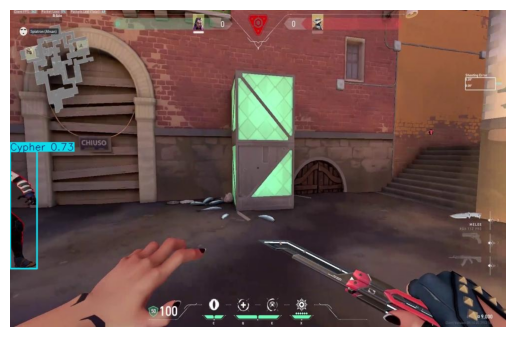

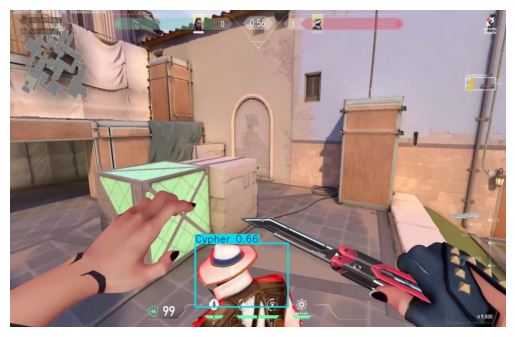

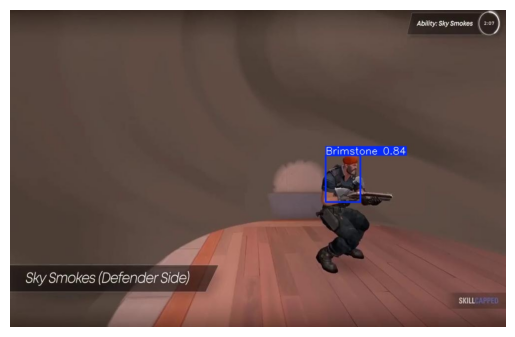

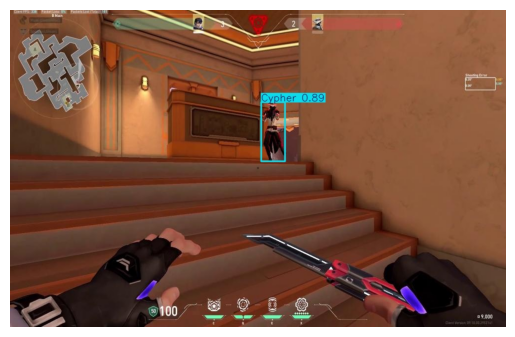

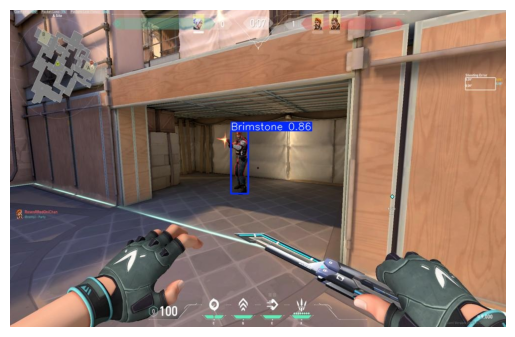

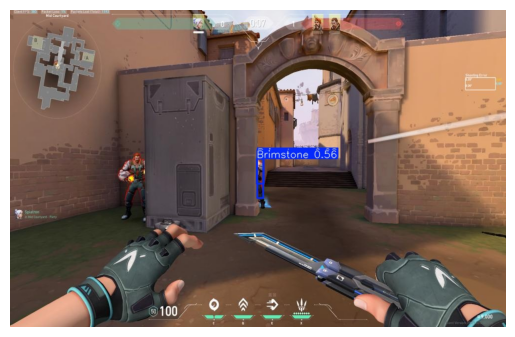

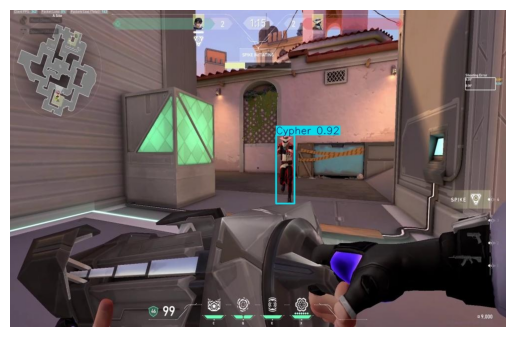

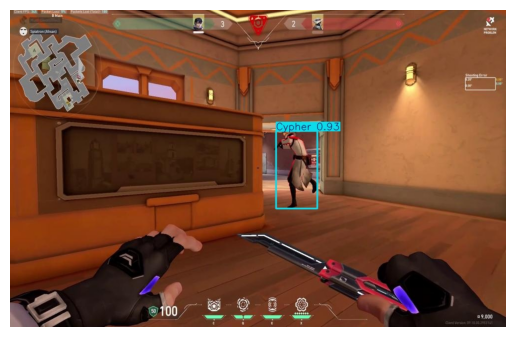

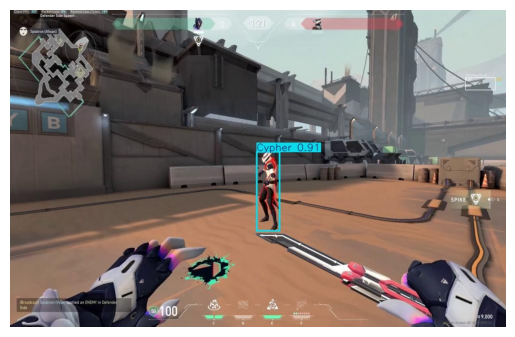

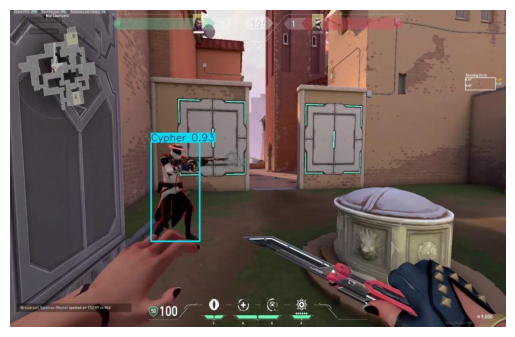

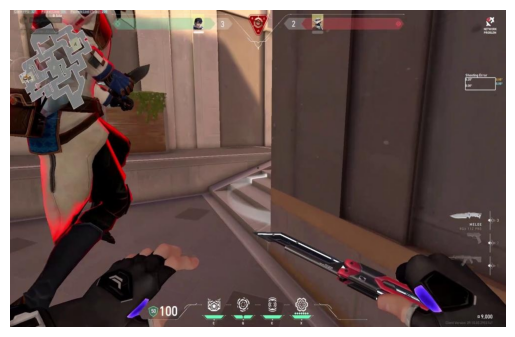

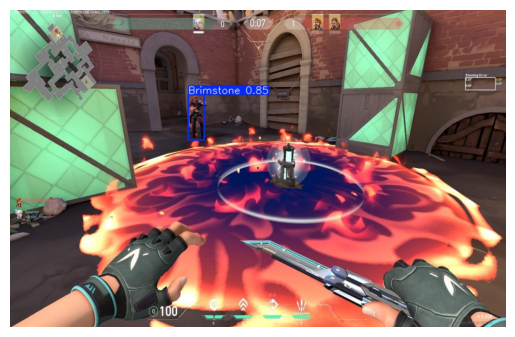

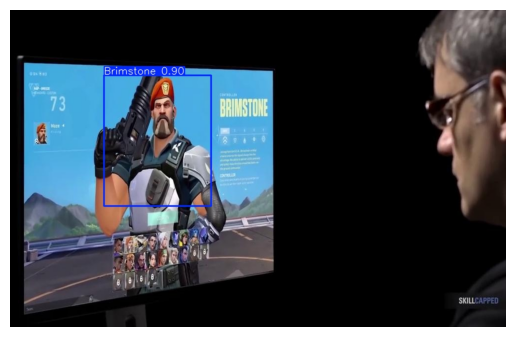

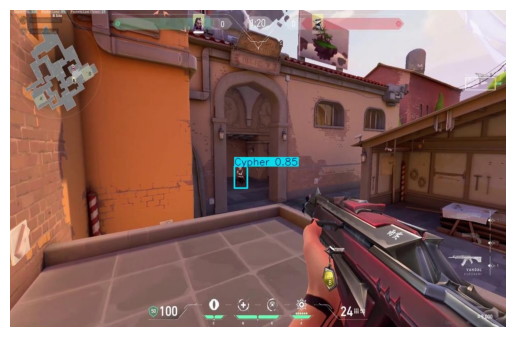

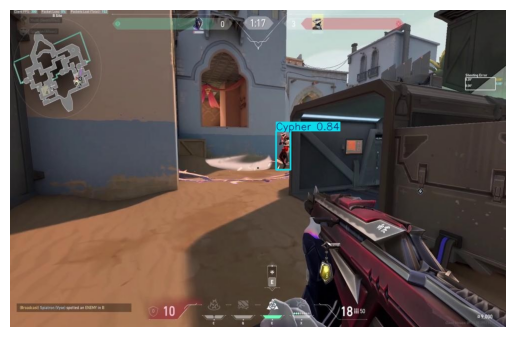

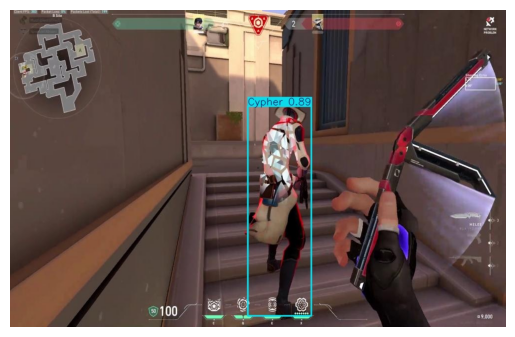

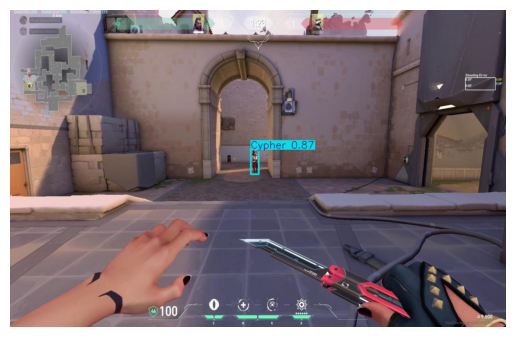

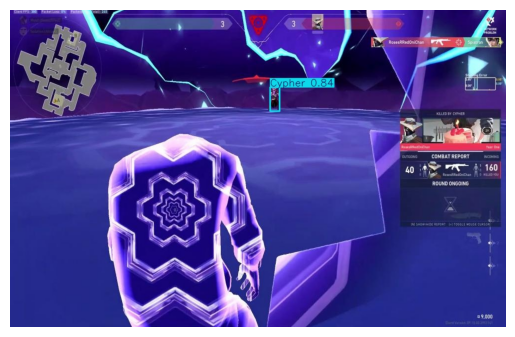

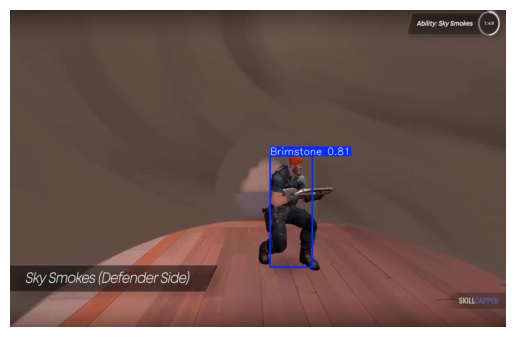

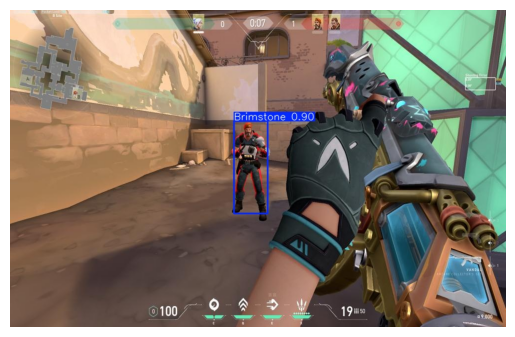

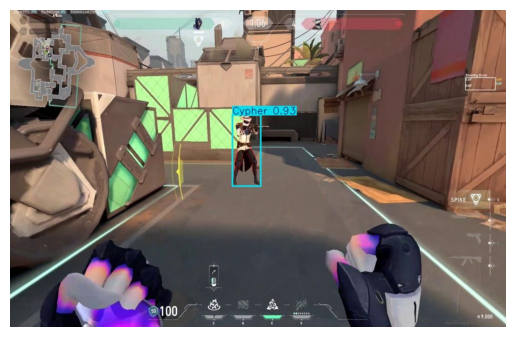

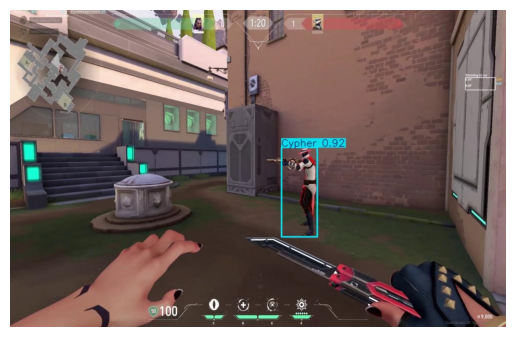

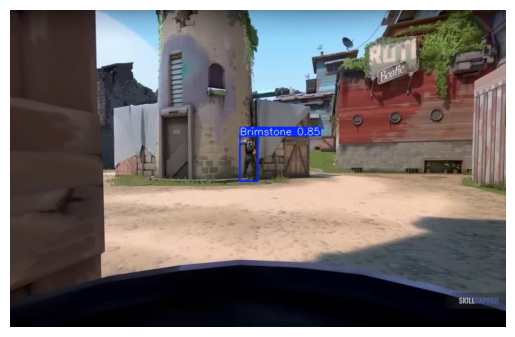

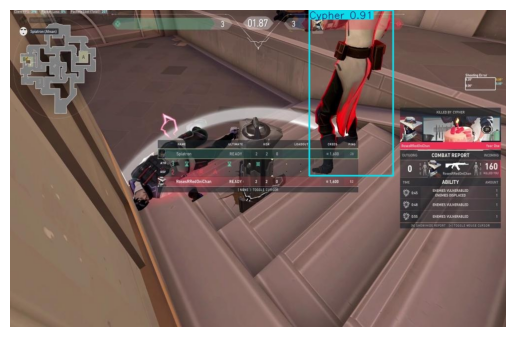

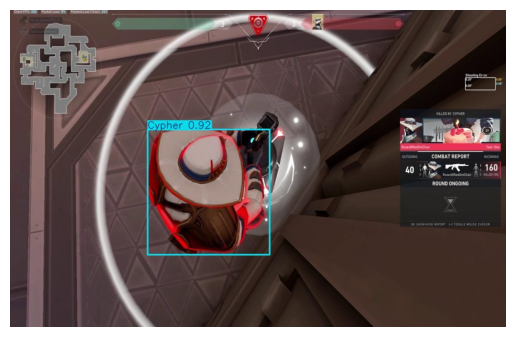

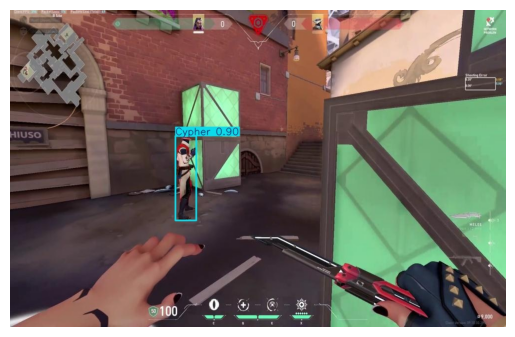

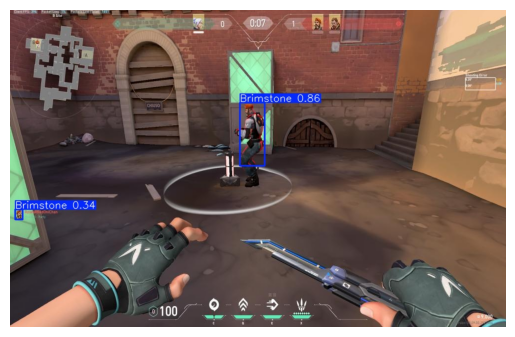

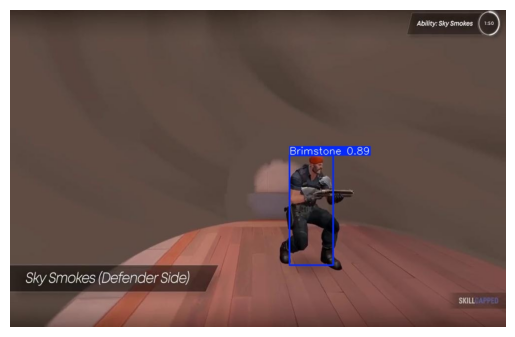

In [ ]:
predicted_images = glob.glob("runs/detect/predict/*.jpg")
for img_path in predicted_images[:34]:
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [20]:
#https://drive.google.com/file/d/1uaYaJxPIyZ8v-YMjuvG-cGXNcFhMk1Yr/view?usp=sharing

In [21]:
import gdown

# The file ID extracted from the URL
file_id = "1uaYaJxPIyZ8v-YMjuvG-cGXNcFhMk1Yr"

# Download the file using the gdown library
gdown.download(f"https://drive.google.com/uc?id={file_id}", "cypher.mp4", quiet=False)
import cv2

Downloading...
From: https://drive.google.com/uc?id=1uaYaJxPIyZ8v-YMjuvG-cGXNcFhMk1Yr
To: /content/cypher.mp4
100%|██████████| 73.8M/73.8M [00:02<00:00, 24.7MB/s]


In [23]:
video_path = "cypher.mp4"
output_path = "cyphertested.mp4"

In [ ]:
results = model.predict(source=video_path, conf=0.5, imgsz=640, save=True, save_txt=False, optimize=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/11743) /content/cypher.mp4: 384x640 (no detections), 43.8ms
video 1/1 (frame 2/11743) /content/cypher.mp4: 384x640 1 Cypher, 10.9ms
video 1/1 (frame 3/11743) /content/cypher.mp4: 384x640 1 Cypher, 19.4ms
video 1/1 (frame 4/11743) /content/cypher.mp4: 384x640 1 Cypher, 11.1ms
video 1/1 (frame 5/11743) /content/cypher.mp4: 384x640 1 Cypher, 10.8ms
video 1/1 (frame 6/11743) /content/cypher.mp4: 384x640 1 Cypher, 10.9ms
video 1/1 (frame 